In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!wget https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt

--2022-01-02 16:19:34--  https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt [following]
--2022-01-02 16:19:34--  https://www.dropbox.com/s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4aa526489c080a58be014011a2.dl.dropboxusercontent.com/cd/0/inline/BdBiAjkPOHjUNXfLshJYeQvvVmOSkC8dI6mC4NBHjYUf4xM-m_RlBp3OEAc1F9oij9gG0m4BaTuPF_Xieo5XEGFUJ7zKsFrNb4ex2oXsxV-0DkG3zo8dFRZQ_jk22uTIufrEo6HC9G-oRnwvMIELlDiD/file# [following]
--2022-01-02 16:19:34--  https://uc4aa526489c080a58be014011a2.dl.dropboxusercontent.com/cd/0/inline/BdBiAjkPOHjUNXfLshJYeQvvVmOSkC8dI6mC4NBHjYUf4xM-m_RlBp3OEAc1F9oij9

In [2]:
%cd /content/
#df = pd.read_csv('/content/gdrive/MyDrive/dlku/NTP2015fire-Jan.txt', sep='\t', header=None)
df = pd.read_csv('NTP2015-2017fire.txt', sep='\t', header=None)
df.columns = ["date", "station", "addr1", "addr2", "longitude", "latitude", "township"]
#set date time format
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')
df

/content


,date,station,addr1,addr2,longitude,latitude,township
0,2015-01-01 00:13:00,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015-01-01 00:16:00,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015-01-01 00:48:00,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015-01-01 00:56:00,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015-01-01 01:04:00,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017-12-31 17:14:00,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017-12-31 18:40:00,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017-12-31 20:09:00,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017-12-31 20:44:00,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [3]:
#Extraction of the temporal domain
maxlimit = len(df)
ones = np.ones(maxlimit, dtype="uint32")
dftemp = pd.DataFrame(df.date)
dftemp['freq'] = ones
#when running this block, we will obtain the monthly frequency to be used in the temporal domain (a.k.a. time series).
dftempday = dftemp.groupby(pd.Grouper(key="date", freq="1D")).count()
dftempweek = dftemp.groupby(pd.Grouper(key="date", freq="1W")).count()
dftempmonth = dftemp.groupby(pd.Grouper(key="date", freq="1M")).count()
dftempday

,freq
date,
2015-01-01,34
2015-01-02,25
2015-01-03,24
2015-01-04,34
2015-01-05,28
...,...
2017-12-27,13
2017-12-28,19
2017-12-29,19


In [4]:
dftempday

,freq
date,
2015-01-01,34
2015-01-02,25
2015-01-03,24
2015-01-04,34
2015-01-05,28
...,...
2017-12-27,13
2017-12-28,19
2017-12-29,19


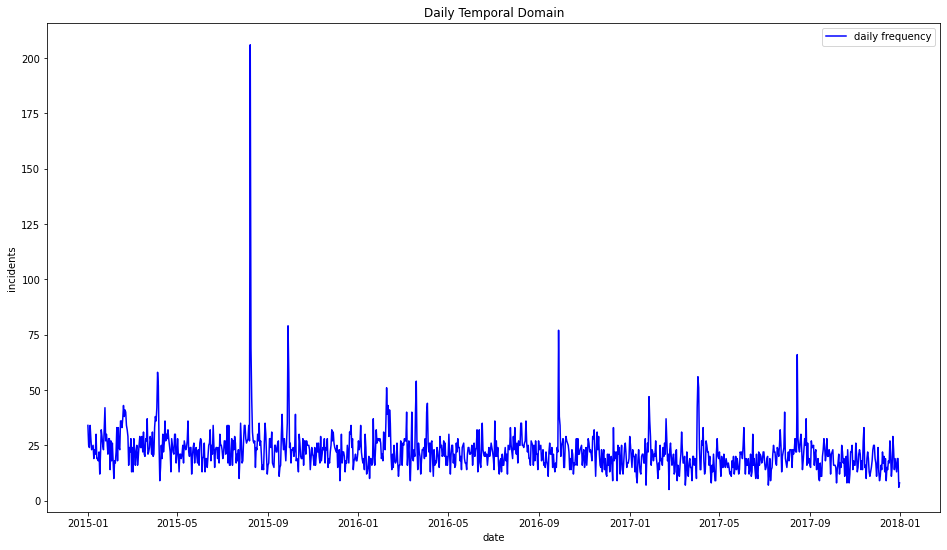

In [5]:
y = dftempday['freq']
x = dftempday.index
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(x, y, color='b', label='daily frequency') 
plt.xlabel('date')
plt.ylabel('incidents')
plt.title('Daily Temporal Domain')
plt.legend() 
plt.show()

Keras Vanilla LSTM Model

In [6]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

Convert Dataset to Matrix

In [7]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

Dataprep & TTS

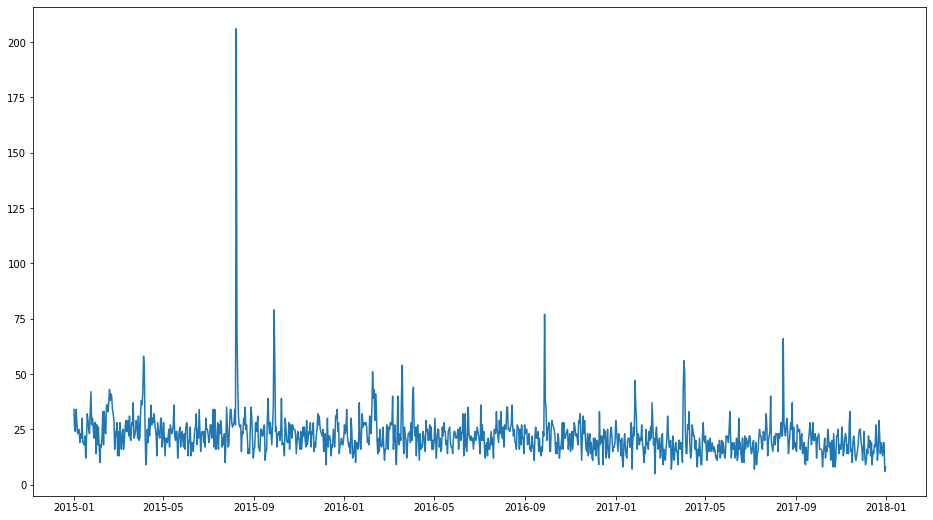

In [8]:
# load the dataset
#dataframe = pd.read_csv('uberday.csv', usecols=[1], engine='python')
dataframe = dftempday
dataset = dataframe.values
dataset = dataset.astype('float32')

dataplot = dataframe.copy()
#training_set = pd.read_csv('shampoo.csv')

#dataplot = dataplot.iloc[:,1:2].values

#plt.plot(training_set, label = 'Shampoo Sales Data')
plt.plot(dataplot, label = 'Taxi Daily Ridership Data (104/01-08)')
plt.show()

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
#here, you can change the test size to make future prediction
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


Model design & training

Epoch 1/100
585/585 - 13s - loss: 0.0034 - val_loss: 0.0013 - 13s/epoch - 22ms/step
Epoch 2/100
585/585 - 4s - loss: 0.0028 - val_loss: 0.0013 - 4s/epoch - 6ms/step
Epoch 3/100
585/585 - 2s - loss: 0.0028 - val_loss: 0.0013 - 2s/epoch - 4ms/step
Epoch 4/100
585/585 - 2s - loss: 0.0027 - val_loss: 0.0019 - 2s/epoch - 4ms/step
Epoch 5/100
585/585 - 2s - loss: 0.0027 - val_loss: 0.0018 - 2s/epoch - 4ms/step
Epoch 6/100
585/585 - 2s - loss: 0.0027 - val_loss: 0.0012 - 2s/epoch - 4ms/step
Epoch 7/100
585/585 - 2s - loss: 0.0027 - val_loss: 0.0012 - 2s/epoch - 4ms/step
Epoch 8/100
585/585 - 2s - loss: 0.0026 - val_loss: 0.0015 - 2s/epoch - 4ms/step
Epoch 9/100
585/585 - 2s - loss: 0.0026 - val_loss: 0.0012 - 2s/epoch - 4ms/step
Epoch 10/100
585/585 - 2s - loss: 0.0026 - val_loss: 0.0014 - 2s/epoch - 4ms/step
Epoch 11/100
585/585 - 2s - loss: 0.0026 - val_loss: 0.0013 - 2s/epoch - 4ms/step
Epoch 12/100
585/585 - 2s - loss: 0.0026 - val_loss: 0.0013 - 2s/epoch - 4ms/step
Epoch 13/100
585/585 -

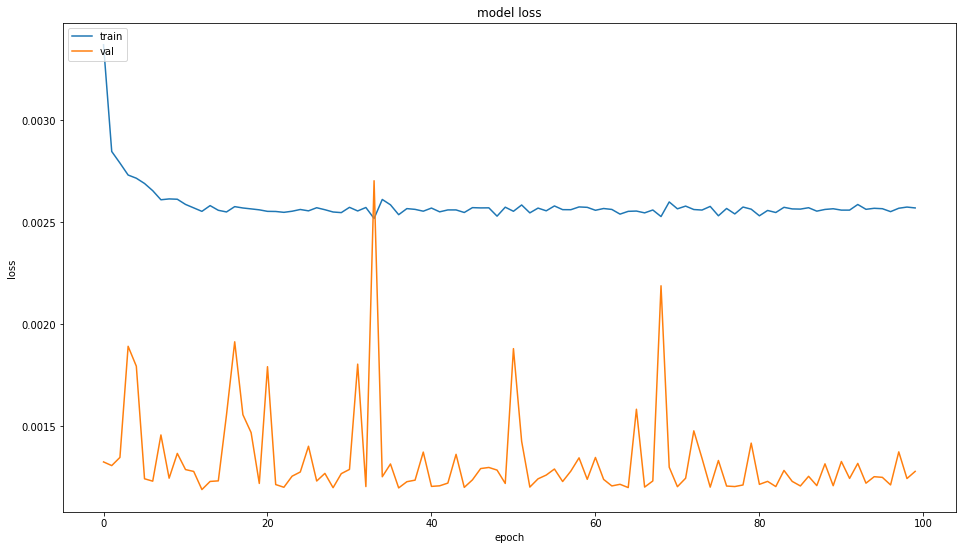

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, validation_split=0.2, epochs=100, batch_size=1, verbose=2)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Make prediction & calculate RMSE

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trmse = mean_squared_error(trainY[0], trainPredict[:,0])
trmae = metrics.mean_absolute_error(trainY[0], trainPredict[:,0])
trmape = metrics.mean_absolute_percentage_error(trainY[0], trainPredict[:,0])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %f RMSE' % (trainScore))
print('Train Score: %f MSE' % (trmse))
print('Train Score: %f MAE' % (trmae))
print('Train Score: %f MAPE' % (trmape))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %f RMSE' % (testScore))
mse = mean_squared_error(testY[0], testPredict[:,0])
mae = metrics.mean_absolute_error(testY[0], testPredict[:,0])
mape = metrics.mean_absolute_percentage_error(testY[0], testPredict[:,0])
print('Test Score: %f MSE' % (mse))
print('Test Score: %f MAE' % (mae))
print('Test Score: %f MAPE' % (mape))

Train Score: 9.579627 RMSE
Train Score: 91.769263 MSE
Train Score: 5.283182 MAE
Train Score: 0.248342 MAPE
Test Score: 7.224627 RMSE
Test Score: 52.195229 MSE
Test Score: 5.508191 MAE
Test Score: 0.377340 MAPE


Test & Prediction Plot

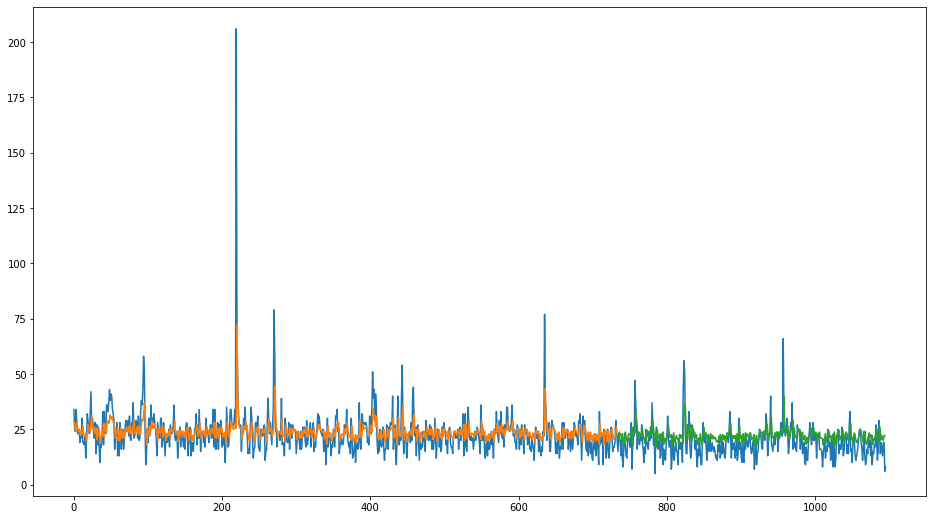

In [11]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()